In [1]:
#Linear Regression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

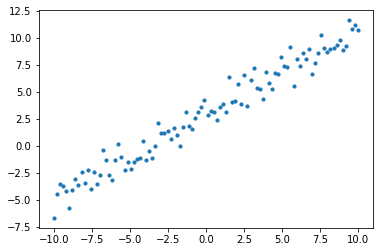

In [2]:
# Sample 100 points near a line
N = 100
M, C = .78, 3.07
X = np.linspace(-10, 10, N)
Y = (M*X + C) + np.random.randn(N)
plt.scatter(X, Y, 10)

In [3]:
# Initialize m and c
m = 0
c = 0
i = 0

In [4]:
while i<1000:
    Y_hat = m*X + c
    costs = (Y_hat-Y)**2    
    loss = np.sum(costs)/N
    print('Loss = %f' %loss)
    dY_hat = 2/N*(Y_hat-Y)
    dm = np.dot(dY_hat, X)
    dc = np.sum(dY_hat)
    m-=.001*dm
    c-=.001*dc
    i+=1


Loss = 30.520207
Loss = 27.735840
Loss = 25.312892
Loss = 23.203892
Loss = 21.367603
Loss = 19.768209
Loss = 18.374598
Loss = 17.159749
Loss = 16.100189
Loss = 15.175531
Loss = 14.368065
Loss = 13.662409
Loss = 13.045203
Loss = 12.504842
Loss = 12.031244
Loss = 11.615654
Loss = 11.250467
Loss = 10.929077
Loss = 10.645744
Loss = 10.395486
Loss = 10.173972
Loss = 9.977443
Loss = 9.802631
Loss = 9.646699
Loss = 9.507183
Loss = 9.381943
Loss = 9.269117
Loss = 9.167092
Loss = 9.074465
Loss = 8.990015
Loss = 8.912685
Loss = 8.841556
Loss = 8.775827
Loss = 8.714806
Loss = 8.657889
Loss = 8.604552
Loss = 8.554342
Loss = 8.506862
Loss = 8.461769
Loss = 8.418765
Loss = 8.377591
Loss = 8.338022
Loss = 8.299862
Loss = 8.262940
Loss = 8.227110
Loss = 8.192243
Loss = 8.158227
Loss = 8.124965
Loss = 8.092373
Loss = 8.060379
Loss = 8.028917
Loss = 7.997933
Loss = 7.967379
Loss = 7.937212
Loss = 7.907397
Loss = 7.877901
Loss = 7.848697
Loss = 7.819761
Loss = 7.791072
Loss = 7.762612
Loss = 7.734364
Los

Original parameters: {m:0.780000, c: 3.070000}
Predicted parameters: {m:0.808352, c: 2.641736}


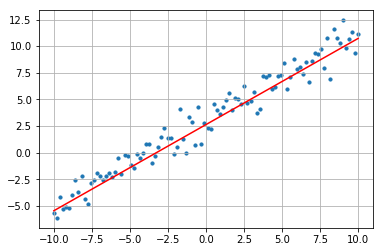

In [5]:
plt.grid()
plt.scatter(X, Y, 10)
plt.plot(X, m*X+c, 'r')
print("Original parameters: {m:%f, c: %f}" %(M, C))
print("Predicted parameters: {m:%f, c: %f}" %(m, c))


## Let us make our code modular

This is the thinking:

Initialize $\theta$<br>
i = 0 <br>
while i < 1000:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;$Y_{hat}, loss = forwardProp(\theta, X, Y)$<br>
    &nbsp;&nbsp;&nbsp;&nbsp;$\partial \theta = backProp(X, Y_{hat}, Y)$<br>
    &nbsp;&nbsp;&nbsp;&nbsp;$\theta = update(\theta, \partial \theta)$<br>


In [5]:
import numpy as np
def sample(N = 100):
    M, C = .78, 3.07
    X = np.linspace(-10, 10, N)
    Y = (M*X + C) + np.random.randn(N)
    return X, Y, M, C

In [6]:
def forward_prop(theta, X, Y):
    N = X.shape[0]
    m, c = theta['m'], theta['c']
    Y_hat = m*X + c
    costs = (Y_hat-Y)**2
    loss = np.sum(costs)/N
    return Y_hat, loss
    

In [7]:
def back_prop(X, Y_hat, Y):
    N = X.shape[0]
    dY_hat = 2/N*(Y_hat-Y)
    dm = np.dot(dY_hat, X)
    dc = np.sum(dY_hat)
    dtheta = {'dm': dm, 'dc': dc}
    return dtheta
    

In [8]:
def update(theta, dtheta, learning_rate=.001):
    theta['m']-=learning_rate*dtheta['dm']
    theta['c']-=learning_rate*dtheta['dc']
    return theta

In [9]:
X, Y, m_orig, c_orig = sample()
theta = {'m': 0, 'c': 0}
i = 0
while i<1000:
    Y_hat, loss = forward_prop(theta, X, Y)
    dtheta = back_prop(X, Y_hat, Y)
    theta = update(theta, dtheta)
    print('Loss=%f at %ith iteration' %(loss, i))
    i+=1

Loss=31.686772 at 0th iteration
Loss=28.730678 at 1th iteration
Loss=26.158656 at 2th iteration
Loss=23.920256 at 3th iteration
Loss=21.971656 at 4th iteration
Loss=20.274794 at 5th iteration
Loss=18.796609 at 6th iteration
Loss=17.508383 at 7th iteration
Loss=16.385172 at 8th iteration
Loss=15.405311 at 9th iteration
Loss=14.549980 at 10th iteration
Loss=13.802832 at 11th iteration
Loss=13.149669 at 12th iteration
Loss=12.578158 at 13th iteration
Loss=12.077587 at 14th iteration
Loss=11.638650 at 15th iteration
Loss=11.253265 at 16th iteration
Loss=10.914413 at 17th iteration
Loss=10.615994 at 18th iteration
Loss=10.352712 at 19th iteration
Loss=10.119967 at 20th iteration
Loss=9.913762 at 21th iteration
Loss=9.730626 at 22th iteration
Loss=9.567544 at 23th iteration
Loss=9.421897 at 24th iteration
Loss=9.291409 at 25th iteration
Loss=9.174104 at 26th iteration
Loss=9.068267 at 27th iteration
Loss=8.972406 at 28th iteration
Loss=8.885226 at 29th iteration
Loss=8.805602 at 30th iterati